# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

for city in cities:
    
    response_json = requests.get(query_url + city).json()
     
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City: {city}, ID: {city_id}")
    
    except:
        
        print("City could not be found, next city...")

City: merauke, ID: 2082539
City: atuona, ID: 4020109
City: provideniya, ID: 4031574
City: dikson, ID: 1507390
City: bilma, ID: 2446796
City: jamestown, ID: 5122534
City: kapaa, ID: 5848280
City: victoria, ID: 1819729
City: raudeberg, ID: 3146487
City: tasiilaq, ID: 3424607
City: atraulia, ID: 1278189
City: leningradskiy, ID: 2123814
City: ancud, ID: 3899695
City: butaritari, ID: 2110227
City: yellowknife, ID: 6185377
City: rikitea, ID: 4030556
City: san carlos de bariloche, ID: 7647007
City: hami, ID: 1529484
City: lebu, ID: 3883457
City: senanga, ID: 898947
City: tuatapere, ID: 2180815
City: busselton, ID: 2075265
City could not be found, next city...
City: mataura, ID: 6201424
City: cape town, ID: 3369157
City: port alfred, ID: 964432
City: victor harbor, ID: 2059470
City: ushuaia, ID: 3833367
City: karratha, ID: 6620339
City: ngama, ID: 2427036
City: aykino, ID: 580182
City: sinnamary, ID: 3380290
City: tuktoyaktuk, ID: 6170031
City: kodiak, ID: 5866583
City: husavik, ID: 2629833
Ci

City: miri, ID: 1738050
City: egvekinot, ID: 4031742
City could not be found, next city...
City: umea, ID: 602150
City: hazorasp, ID: 1513957
City: kruisfontein, ID: 986717
City: bangui, ID: 2389853
City: am timan, ID: 245338
City: san gabriel casa blanca, ID: 3519231
City: nuuk, ID: 3421319
City: yulara, ID: 6355222
City: souillac, ID: 933995
City: lasa, ID: 3175096
City: port lincoln, ID: 2063036
City: saint anthony, ID: 5044290
City: pemangkat, ID: 1631637
City: ambilobe, ID: 1082243
City: pahrump, ID: 5509851
City: teguldet, ID: 1489822
City: hofn, ID: 2630299
City could not be found, next city...
City: padang, ID: 1633419
City: sur, ID: 286245
City: rabak, ID: 368277
City: srivardhan, ID: 1255619
City: cranbrook, ID: 5931800
City: raga, ID: 368246
City: bandarbeyla, ID: 64814
City: manggar, ID: 1636426
City: leshukonskoye, ID: 535839
City: chandur, ID: 1274676
City: tessalit, ID: 2449893
City: tankhoy, ID: 2015576
City: alcaniz, ID: 3130606
City: katsuura, ID: 2112309
City: sao fe

City: bonfim, ID: 3405215
City could not be found, next city...
City: saint-esteve, ID: 6441022
City: quime, ID: 3906765
City: ranong, ID: 1150965
City: ozernovskiy, ID: 2122293
City: salalah, ID: 286621
City: nara, ID: 1855612
City: dulce grande, ID: 3974329
City: lewiston, ID: 4969398
City: kenai, ID: 5866063
City: san joaquin, ID: 5392126
City: santiago, ID: 3871336
City: sakaiminato, ID: 1853174
City: dorado, ID: 4564133
City: henties bay, ID: 3356832
City: touros, ID: 3386213
City: sorland, ID: 3137469
City: vrede, ID: 942701
City: moberly, ID: 4398730
City: hualmay, ID: 3939761


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,2082539,Merauke,ID,-8.4667,140.3333,80.78,85,74,15.08
1,4020109,Atuona,PF,-9.8000,-139.0333,80.10,74,18,15.14
2,4031574,Provideniya,RU,64.3833,-173.3000,-2.20,71,0,17.90
3,1507390,Dikson,RU,73.5069,80.5464,-24.97,79,0,6.02
4,2446796,Bilma,NE,18.6853,12.9164,74.79,17,74,8.66


In [5]:
cities_df.to_csv("output_data/cities.csv", index=False, header=True)

In [6]:
#check if there are any cities with >100% humidity
test_stats = cities_df["Humidity"].describe(include = "all")
print(f"There are no cities that has a humidity level greater than 100%")
test_stats

There are no cities that has a humidity level greater than 100%


count    549.000000
mean      69.267760
std       22.710477
min        1.000000
25%       56.000000
50%       76.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

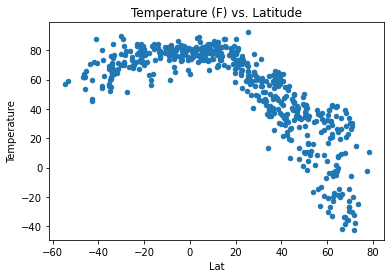

In [7]:
lat_vs_temp = cities_df.plot(kind="scatter", x="Lat", y="Temperature", 
                                      title="Temperature (F) vs. Latitude")

lat_vs_temp.get_figure().savefig("output_data/LatVsTemp.png")

## Latitude vs. Humidity Plot

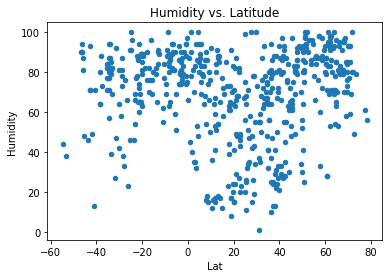

In [8]:
lat_vs_humidity = cities_df.plot(kind="scatter", x="Lat", y="Humidity", 
                                      title="Humidity vs. Latitude")

lat_vs_humidity.get_figure().savefig("output_data/LatVsHumidity.png")

## Latitude vs. Cloudiness Plot

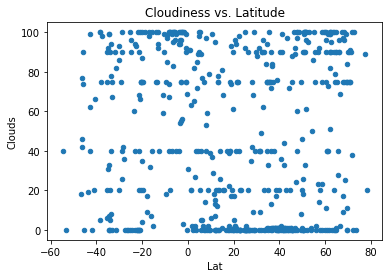

In [9]:
lat_vs_cloudiness = cities_df.plot(kind="scatter", x="Lat", y="Clouds", 
                                      title="Cloudiness vs. Latitude")

lat_vs_cloudiness.get_figure().savefig("output_data/LatVsCLoudiness.png")

## Latitude vs. Wind Speed Plot

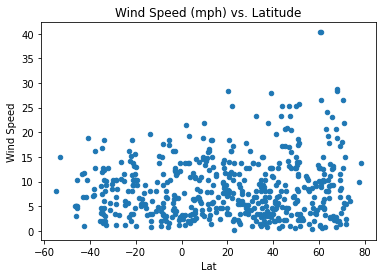

In [10]:
lat_vs_wind_speed = cities_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
                                      title="Wind Speed (mph) vs. Latitude")

lat_vs_wind_speed.get_figure().savefig("output_data/LatVsWindSpeed.png")

## Linear Regression

In [11]:
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

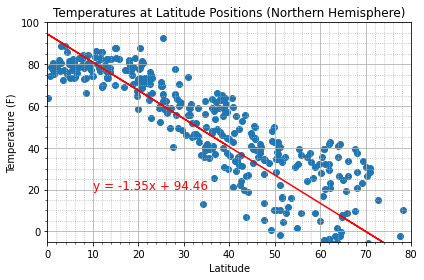

In [12]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("output_data/nh_tempVSlat_regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

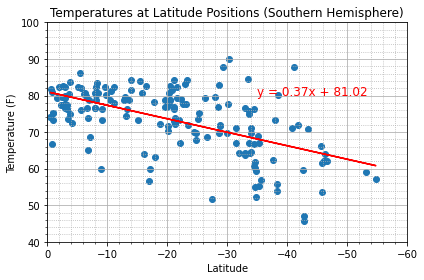

In [13]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("output_data/sh_latVStemp_regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

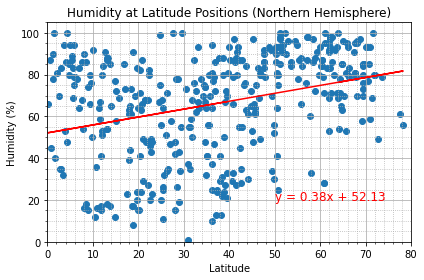

In [14]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("output_data/nh_latVShumidity_regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

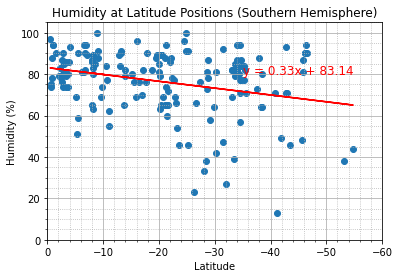

In [15]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.savefig("output_data/sh_latVShumidity_regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

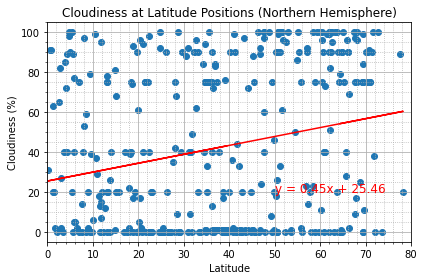

In [16]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("output_data/nh_latVSclouds_regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

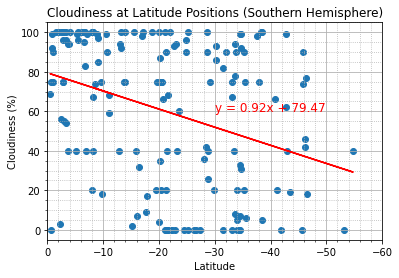

In [17]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.savefig("output_data/sh_latVSclouds_regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

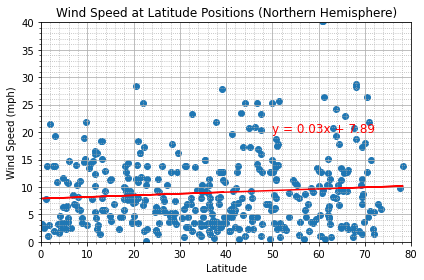

In [18]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("output_data/nh_latVSwind_regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

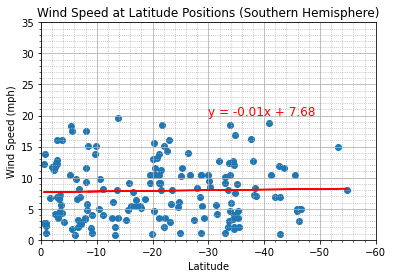

In [19]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.savefig("output_data/sh_latVSwind_regression.png")
plt.show()